In [1]:
import pandas
import os
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import SimpleITK as sitk
import json
import pandas as pd
import numpy as np

## Analyse summary.json files from CV


In [15]:
path_to_results219="nnUNet_results/Dataset219_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/crossval_results_folds_0_1_2_3_4/postprocessed/summary.json"

path_to_results218="nnUNet_results/Dataset218_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/crossval_results_folds_0_1_2_3_4/postprocessed/summary.json"

path_to_results_a_219 = "nnUNet_results/Dataset219_PETCT/nnUNetTrainer_1500epochs_NoMirroring__nnUNetPlans__3d_fullres/crossval_results_folds_0_1_2_3_4/postprocessed/summary.json"

path_to_results_f_219 = "nnUNet_results/Dataset219_PETCT/nnUNetTrainer_probabilisticOversampling_033__nnUNetPlans__3d_fullres/crossval_results_folds_0_1_2/postprocessed/summary.json"

path_to_results_e_219 = "nnUNet_results/Dataset219_PETCT/nnUNetTrainer_1500epochs_1e2lr__nnUNetPlans__3d_fullres/crossval_results_folds_0_1_2/postprocessed/summary.json"

path_to_results_c0_219 = "nnUNet_results/Dataset219_PETCT/nnUNetTrainer_1500epochs_1e2lr__nnUNetPlans__3d_fullres_maxnum_512_patch_192/fold_0/validation/summary.json"

path_to_results_c2_219 = "nnUNet_results/Dataset219_PETCT/nnUNetTrainer_1500epochs_1e2lr__nnUNetPlans__3d_fullres_maxnum_512_patch_192/fold_2/validation/summary.json"

path_to_results_c1_219 = "nnUNet_results/Dataset219_PETCT/nnUNetTrainer_1500epochs_1e2lr__nnUNetPlans__3d_fullres_maxnum_512_patch_192/fold_1/validation/summary.json"

path_to_results_g_219 = "nnUNet_results/Dataset219_PETCT/nnUNetTrainer_probabilisticOversampling_010__nnUNetPlans__3d_fullres/fold_0/validation/summary.json"


In [16]:
def make_results_df(path_to_summary_json): 
    with open(path_to_summary_json, "r") as read_file:
            dict_results = json.load(read_file)

    metrics_per_case = dict_results['metric_per_case']
    results = []
    for case in metrics_per_case:
        metrics = case['metrics']['1']
        row = {
            'DICE': metrics['Dice'],
            'FN': metrics['FN'],
            'FP': metrics['FP'],
            'IoU': metrics['IoU'],
            'TN': metrics['TN'],
            'TP': metrics['TP'],
            'n_pred': metrics['n_pred'],
            'n_ref': metrics['n_ref'],
            'prediction_file': case['prediction_file'],
            'reference_file': case['reference_file']
            }
        results.append(row)

    df = pd.DataFrame(results)
    
    return df

In [17]:
df = make_results_df(path_to_results219)
df2 = make_results_df(path_to_results218)
df_a = make_results_df(path_to_results_a_219)
df_f = make_results_df(path_to_results_f_219)
df_e = make_results_df(path_to_results_e_219)
df_c0 = make_results_df(path_to_results_c0_219)
df_c1 = make_results_df(path_to_results_c1_219)
df_c2= make_results_df(path_to_results_c2_219)
df_g = make_results_df(path_to_results_g_219)

In [18]:
df_g

,DICE,FN,FP,IoU,TN,TP,n_pred,n_ref,prediction_file,reference_file
0,0.890217,107,187,0.802153,52158514,1192,1379,1299,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUNet_prepro...
1,0.516129,7609,236,0.347826,52147971,4184,4420,11793,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUNet_prepro...
2,0.833812,1242,2057,0.714989,45428425,8276,10333,9518,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUNet_prepro...
3,0.844891,0,170,0.731438,40639367,463,633,463,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUNet_prepro...
4,0.825182,1283,5648,0.702392,52136711,16358,22006,17641,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUNet_prepro...
...,...,...,...,...,...,...,...,...,...,...
179,0.785067,718,2103,0.646181,52312027,5152,7255,5870,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUNet_prepro...
180,NaN,0,0,NaN,50880000,0,0,0,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUNet_prepro...
181,0.629134,2841,400,0.458932,52154010,2749,3149,5590,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUNet_prepro...
182,NaN,0,0,NaN,92320000,0,0,0,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUNet_prepro...


In [6]:
df_e['DICE'].mean()

0.3525527878093577

In [19]:
df_g[df_g['n_ref']!=0]['DICE'].mean()

0.7224434092355995

In [6]:
df_c2[df_c2['n_ref']!=0]['DICE'].mean()

0.7285005641755844

In [7]:
df_c1[df_c1['n_ref']!=0]['DICE'].mean()

0.7423402940303833

In [15]:
(0.7555093038656706 + 0.7285005641755844)/2

0.7420049340206275

In [9]:
df['n_pred'].mean()

8220.30359085963

In [10]:
df['n_ref'].mean()

8611.700761697497

In [12]:
df[df['TP']!=0]['DICE'].mean()

0.7204990836768962

In [13]:
df['FN'].mean()

2330.8781284004353

In [14]:
df['TN'].mean()

55875934.12840044

In [15]:
# analyse number of Nans - true negatives:
print(len(df)-len(df.dropna()))

# images with no cancer at all
print(len(df[df['TP']==0]))
# really overestimates the number of times there is cancer

105
471


In [16]:
neg_preds_df = df[df['n_pred']==0]
print(len(neg_preds_df))

106


In [17]:
print(df[df['TP']!=0]['n_pred'].mean())
print(df[df['TP']!=0]['n_ref'].mean())


15518.35044642857
17662.787946428572


In [18]:
print(df[df['TP']==0]['n_pred'].mean())
print(df[df['TP']==0]['n_ref'].mean())


1278.6369426751592
2.5987261146496814


In [19]:
df[df['TN']!=0]['DICE'].mean()

0.39654003622512224

In [20]:
df[df['n_ref'] > 0]['FN'].median()

1152.0

In [21]:
df[df['n_ref'] > 0]['FP'].median()

996.0

### Make some plots

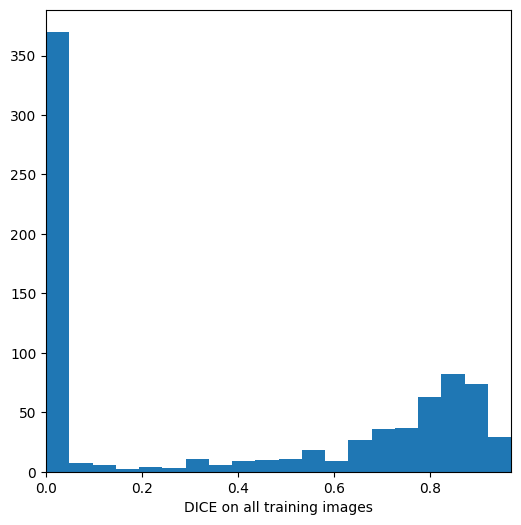

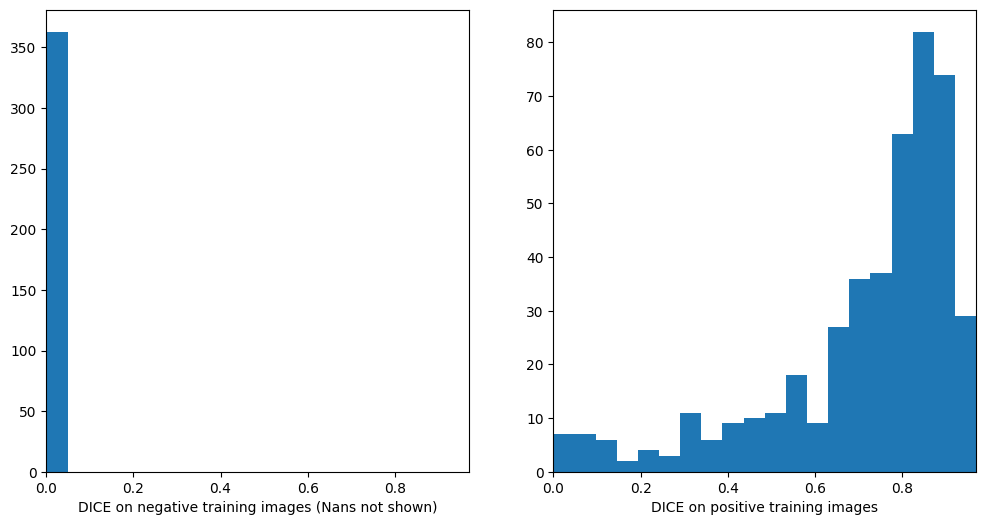

In [22]:
# Create a 1x2 grid of subplots
def plot_metric(df,metric):
    metric_all = df[metric]
    metric_min = metric_all.min()
    metric_max = metric_all.max()
    
    plt.figure(figsize=(6, 6))
    plt.hist(df[metric], bins=20)
    plt.xlabel(str(metric)+' on all training images')
    plt.xlim(metric_min, metric_max)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    # Plot histogram for all training images
    axs[0].hist(df[df['n_ref'] == 0][metric], bins=20)
    axs[0].set_xlim(metric_min, metric_max)
    axs[0].set_xlabel(str(metric)+ ' on negative training images (Nans not shown)')


    # Plot histogram for positive training images
    axs[1].hist(df[df['n_ref'] > 0][metric], bins=20)
    axs[1].set_xlim(metric_min, metric_max)
    axs[1].set_xlabel(str(metric)+ ' on positive training images')

    plt.show()

plot_metric(df,'DICE')

In [23]:
plot_metric('FN')

TypeError: plot_metric() missing 1 required positional argument: 'metric'

In [ ]:
plot_metric(all_metrics_df,'challenge_FN')

In [ ]:
plot_metric('FP')

Text(0.5, 0, 'FP/n_ref on positive training images')

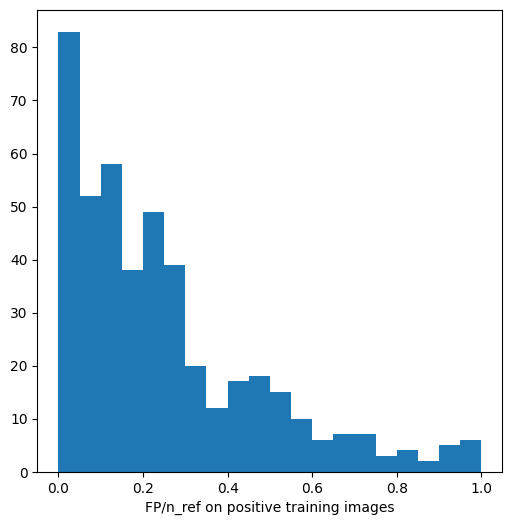

In [25]:
pos_df = df[df['n_ref'] > 0]
plt.figure(figsize=(6, 6))
plt.hist(pos_df['FN']/pos_df['n_ref'], bins=20)
plt.xlabel('FP/n_ref on positive training images')


Text(0.5, 0, 'FP on false positive training images (excluding FP==0 and FP>500)')

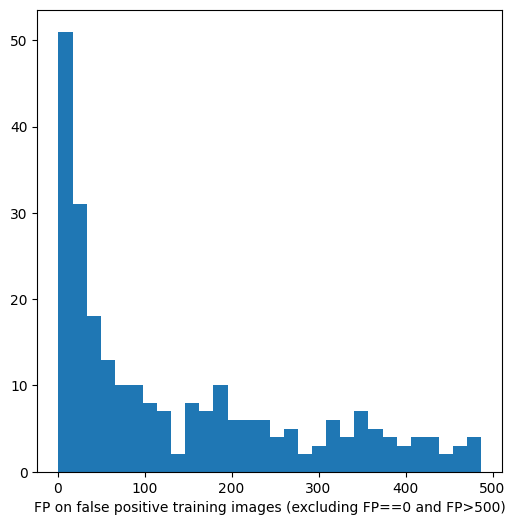

In [26]:
pos_df = df[df['n_ref'] == 0]
fp_df = pos_df[pos_df['n_pred']>0]
small_fp = fp_df[fp_df['FP'] < 500] # just to make plotting easier, means that I am excluding 110 samples (24%)
plt.figure(figsize=(6, 6))
plt.hist(small_fp['FP'], bins=30)
plt.xlabel('FP on false positive training images (excluding FP==0 and FP>500)')


Text(0.5, 0, 'FP on positive training images')

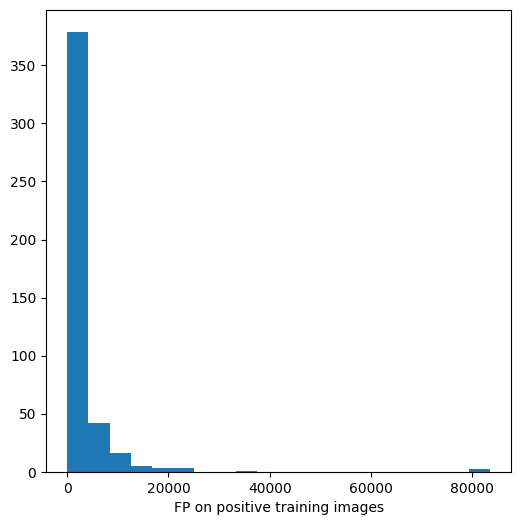

In [27]:
pos_df = df[df['n_ref'] > 0]
plt.figure(figsize=(6, 6))
plt.hist(pos_df['FP'], bins=20)
plt.xlabel('FP on positive training images')

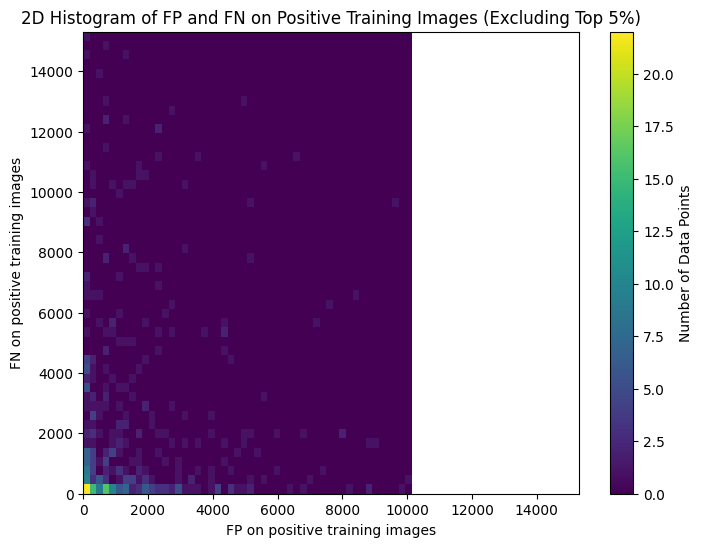

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the positive training data
pos_df = df[df['n_ref'] > 0]

# Extract the FP and FN values
FP_values = pos_df['FP']
FN_values = pos_df['FN']

# Calculate the 95th percentile for both variables
FP_percentile = np.percentile(FP_values, 95)
FN_percentile = np.percentile(FN_values, 95)

# Filter the data to exclude values above the 95th percentile
FP_values_filtered = FP_values[FP_values <= FP_percentile]
FN_values_filtered = FN_values[FN_values <= FN_percentile]

# Create a 2D histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist2d(FP_values_filtered, FN_values_filtered, bins=50, cmap='viridis')
plt.colorbar(label='Number of Data Points')  # Add a colorbar to indicate the frequency of data points

# Set labels and title
plt.xlabel('FP on positive training images')
plt.ylabel('FN on positive training images')
plt.title('2D Histogram of FP and FN on Positive Training Images (Excluding Top 5%)')

# Set the same axis limits for both x and y axes
common_range = (min(min(FP_values_filtered), min(FN_values_filtered)), max(max(FP_values_filtered), max(FN_values_filtered)))
plt.xlim(common_range)
plt.ylim(common_range)

# Show the plot
plt.show()

In [ ]:
pos_df = all_metrics_df[all_metrics_df['n_ref']!=0]

In [ ]:
pos_df['FP-FN'] = pos_df['FP'] - pos_df['FN']
plt.hist(pos_df['FP-FN'],bins=40)
pos_df['FP-FN'].median()

In [ ]:
small_fp

In [ ]:
print(len(pos_df))
print(len(fp_df))
print(len(small_fp))
print(len(small_fp[small_fp['FP']<50]))

In [ ]:
df[df['n_ref']==0]

In [ ]:
plt.hist(df[df['TP']!=0]['DICE'])

### Look at some scores from example images

In [32]:
filtered_df = df[df['prediction_file'].str.contains('9ffd8409b3')]
filtered_df

,DICE,FN,FP,IoU,TN,TP,n_pred,n_ref,prediction_file,reference_file
550,0.858078,320,27,0.751433,49758604,1049,1076,1369,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...


In [33]:
filtered_df = df[df['prediction_file'].str.contains('92c5c944a5')]
filtered_df

,DICE,FN,FP,IoU,TN,TP,n_pred,n_ref,prediction_file,reference_file
493,0.708413,79993,685,0.548483,45261318,98004,98689,177997,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...


In [34]:
filtered_df = df[df['prediction_file'].str.contains('9860ffe82d')]
filtered_df

,DICE,FN,FP,IoU,TN,TP,n_pred,n_ref,prediction_file,reference_file
513,0.0,0,170,0.0,52159830,0,170,0,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...


In [35]:
filtered_df = df[df['prediction_file'].str.contains('82137245b0')]
filtered_df

,DICE,FN,FP,IoU,TN,TP,n_pred,n_ref,prediction_file,reference_file
447,0.780508,21,3222,0.640027,52150991,5766,8988,5787,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...


In [36]:
filtered_df = df[df['prediction_file'].str.contains('b7c1533a39')]
filtered_df

,DICE,FN,FP,IoU,TN,TP,n_pred,n_ref,prediction_file,reference_file
651,0.772163,5269,3636,0.628881,52136005,15090,18726,20359,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...


In [37]:
filtered_df = df[df['prediction_file'].str.contains('cb240e6f0f')]
filtered_df

,DICE,FN,FP,IoU,TN,TP,n_pred,n_ref,prediction_file,reference_file
718,0.0,0,3,0.0,91039997,0,3,0,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...


In [38]:
filtered_df = df[df['prediction_file'].str.contains('ccd8f5ff71')]
filtered_df


,DICE,FN,FP,IoU,TN,TP,n_pred,n_ref,prediction_file,reference_file
726,0.0,0,13263,0.0,50866737,0,13263,0,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...


## Compare results across folds

In [40]:
fold0 = 'nnUNet_results/Dataset219_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation/summary.json'
fold1 = 'nnUNet_results/Dataset219_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_1/validation/summary.json'
fold2 = 'nnUNet_results/Dataset219_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_2/validation/summary.json'
fold3 = 'nnUNet_results/Dataset219_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_3/validation/summary.json'
fold4 = 'nnUNet_results/Dataset219_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_4/validation/summary.json'

list_of_folds = [fold0,fold1,fold2,fold3,fold4]
for fold in list_of_folds:
    df=make_results_df(fold)
    print(df['DICE'].mean())

0.4182794576082057
0.38559523278387275
0.3436575634487143
0.4466689678769976
0.38834994223811503


### Try running challenge evaluation metrics

In [2]:
import numpy as np
import nibabel as nib
import pathlib as plb
import cc3d
import csv
import sys


def nii2numpy(nii_path):
    # input: path of NIfTI segmentation file, output: corresponding numpy array and voxel_vol in ml
    mask_nii = nib.load(str(nii_path))
    mask = mask_nii.get_fdata()
    pixdim = mask_nii.header['pixdim']   
    voxel_vol = pixdim[1]*pixdim[2]*pixdim[3]/1000
    return mask, voxel_vol


def con_comp(seg_array):
    # input: a binary segmentation array output: an array with seperated (indexed) connected components of the segmentation array
    connectivity = 18
    conn_comp = cc3d.connected_components(seg_array, connectivity=connectivity)
    return conn_comp


def false_pos_pix(gt_array,pred_array):
    # compute number of voxels of false positive connected components in prediction mask
    pred_conn_comp = con_comp(pred_array)
    
    false_pos = 0
    for idx in range(1,pred_conn_comp.max()+1):
        comp_mask = np.isin(pred_conn_comp, idx)
        if (comp_mask*gt_array).sum() == 0:
            false_pos = false_pos+comp_mask.sum()
    return false_pos



def false_neg_pix(gt_array,pred_array):
    # compute number of voxels of false negative connected components (of the ground truth mask) in the prediction mask
    gt_conn_comp = con_comp(gt_array)
    
    false_neg = 0
    for idx in range(1,gt_conn_comp.max()+1):
        comp_mask = np.isin(gt_conn_comp, idx)
        if (comp_mask*pred_array).sum() == 0:
            false_neg = false_neg+comp_mask.sum()
            
    return false_neg


def dice_score(mask1,mask2):
    # compute foreground Dice coefficient
    overlap = (mask1*mask2).sum()
    sum = mask1.sum()+mask2.sum()
    dice_score = 2*overlap/sum
    return dice_score



def compute_metrics(nii_gt_path, nii_pred_path):
    # main function
    gt_array, voxel_vol = nii2numpy(nii_gt_path)
    pred_array, voxel_vol = nii2numpy(nii_pred_path)

    false_neg_vol = false_neg_pix(gt_array, pred_array) *voxel_vol
    false_pos_vol = false_pos_pix(gt_array, pred_array) *voxel_vol
    dice_sc = dice_score(gt_array,pred_array)

    return dice_sc, false_pos_vol, false_neg_vol

def find_num_conn_comps(path):
    array, voxel_vol = nii2numpy(path)
    conn_comp = con_comp(array)
    num_comps = np.max(conn_comp)
    
    return num_comps

#test_df['challenge_DICE'], test_df['challenge_FP'],test_df['challenge_FN'] = zip(*test_df.apply(lambda row: compute_metrics(row['reference_file'], row['prediction_file']), axis=1))


In [22]:
df = df_g
df['challenge_DICE'], df['challenge_FP'],df['challenge_FN'] = zip(*df.apply(lambda row: compute_metrics(row['reference_file'], row['prediction_file']), axis=1))



/tmp/slurm-24564382/ipykernel_122701/368949640.py:55: RuntimeWarning: invalid value encountered in scalar divide
  dice_score = 2*overlap/sum


In [24]:
print('DICE')
print(df[df['n_ref']!=0]['challenge_DICE'].mean())
print('FN')
print(df[df['n_ref']!=0]['challenge_FN'].mean())
print('FP')
print(df['challenge_FP'].mean())

DICE
0.7224434092355995
FN
7.22730672199168
FP
23.79108609811119


In [26]:
(df['n_pred']-df['n_ref']).mean()

1488.6195652173913

In [27]:
df.to_csv('g-fold0-CV-results.csv')

## Analyse challenge evaluation metrics

In [3]:
default_metrics_df = pd.read_csv('219-default-CV-results.csv')
a_metrics_df = pd.read_csv('a-219-CV-results.csv')
e_metrics_df = pd.read_csv('e-219-CV-results.csv')
#c_metrics_df = pd.read_csv('c-219-CV-results.csv') # folds 0-2
c_metrics_df = pd.read_csv('c01234-219-CV-all-results.csv') # all folds

f_metrics_df = pd.read_csv('f-219-CV-all-results.csv')
d_metrics_df = pd.read_csv('d-219-CV-all-results.csv')
h_metrics_df = pd.read_csv('h-219-CV-all-results.csv')

metrics_df_dict = {'a':a_metrics_df,'e':e_metrics_df,'c':c_metrics_df,'f':f_metrics_df,'d':d_metrics_df,'default':default_metrics_df,'h':h_metrics_df}
h_metrics_df

,Unnamed: 0,DICE,FN,FP,IoU,TN,TP,n_pred,n_ref,prediction_file,reference_file,challenge_DICE,challenge_FP,challenge_FN
0,0,0.895659,123,151,0.811034,52158550,1176,1327,1299,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...,0.895659,0.833548,0.000000
1,1,0.715265,42,12172,0.556741,48772445,15341,27513,15383,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...,0.715265,138.418799,0.124410
2,2,0.757607,5403,388,0.609797,45425159,9050,9438,14453,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...,0.757607,0.000000,0.099528
3,3,0.000000,0,551,0.000000,46079449,0,551,0,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...,0.000000,6.855003,0.000000
4,4,0.651873,5991,206,0.483540,52148001,5802,6008,11793,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...,0.651873,0.037323,13.448744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,914,NaN,0,0,NaN,92320000,0,0,0,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...,NaN,0.000000,0.000000
915,915,0.000000,0,296,0.000000,45439704,0,296,0,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...,0.000000,3.682542,0.000000
916,916,0.797881,4500,3893,0.663729,45415041,16566,20459,21066,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...,0.797881,8.024459,12.018026
917,917,0.000000,0,13,0.000000,52159987,0,13,0,/well/papiez/users/hri611/python/nnUNet_result...,/well/papiez/users/hri611/python/nnUnet_raw/Da...,0.000000,0.161733,0.000000


In [4]:
    df = metrics_df_dict['h']
    print('DICE')
    print(df[df['n_ref']!=0]['challenge_DICE'].mean())
    print('FN')
    print(df[df['n_ref']!=0]['challenge_FN'].mean())
    print('FP')
    print(df['challenge_FP'].mean())
    print('')

DICE
0.734255528105348
FN
7.429634276497918
FP
10.258197132571347



In [7]:
for key in metrics_df_dict.keys():
    df = metrics_df_dict[key]
    print(key)
    print('DICE')
    print(df[df['n_ref']!=0]['challenge_DICE'].mean())
    print('FN')
    print(df[df['n_ref']!=0]['challenge_FN'].mean())
    print('FP')
    print(df['challenge_FP'].mean())
    print('')

a
DICE
0.7320152097106903
FN
8.264755049694932
FP
8.577332620983933

e
DICE
0.6697141760702858
FN
9.926445650800314
FP
22.254980618165888

c
DICE
0.740910499201347
FN
13.959901354457745
FP
6.745591962866216

f
DICE
0.71394843911523
FN
7.929978485530338
FP
13.200857336366008

d
DICE
0.7407836706007717
FN
13.371455622345323
FP
7.474191263965938

default
DICE
0.7157064068453426
FN
8.345111355842878
FP
11.916101936261462



In [5]:
### add column for number of connected components
a_metrics_df['num_pred_conn_comps'] = [find_num_conn_comps(x) for x in a_metrics_df['prediction_file']]
a_metrics_df['num_gt_conn_comps'] = [find_num_conn_comps(x) for x in a_metrics_df['reference_file']]
a_metrics_df.to_csv('a-219-CV-results.csv')

KeyboardInterrupt: 

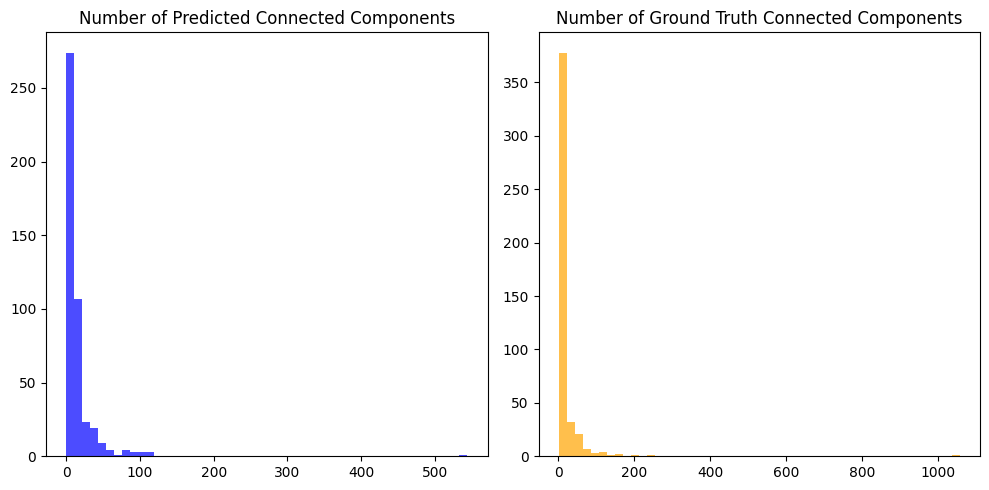

In [79]:
df = a_metrics_df
df = df[df['n_ref']!=0]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df['num_pred_conn_comps'], bins=50, color='blue', alpha=0.7)
axs[0].set_title('Number of Predicted Connected Components')

axs[1].hist(df['num_gt_conn_comps'], bins=50, color='orange', alpha=0.7)
axs[1].set_title('Number of Ground Truth Connected Components')

plt.tight_layout()
plt.show()

Compute DSC, FNs and FPs

In [16]:
# DSC, FN and FP score

df = f_metrics_df
print(df[df['n_ref']>0]['DICE'].mean())
print(df[df['n_ref']>0]['challenge_FN'].mean())
print(df['challenge_FP'].mean())


0.711493220210218
6.84808553651493
14.417655785726462


468
122


(0.0, 25000.0)

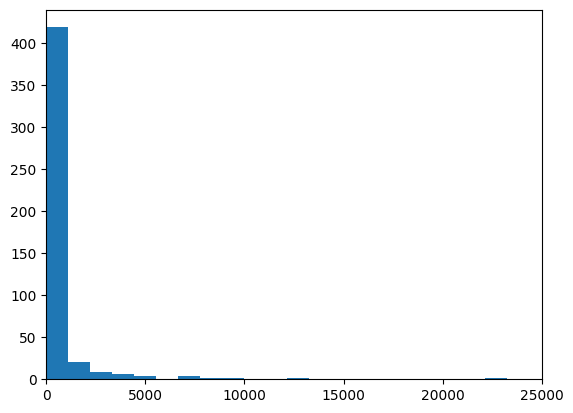

In [27]:
# number of true negative images, and average number of predictions on negative images
df = a_metrics_df
neg_imgs = df[df['n_ref']==0]
print(len(neg_imgs))
print(len(neg_imgs[neg_imgs['n_pred']==0]))
plt.hist(neg_imgs['n_pred'],bins=200)
plt.xlim([0,25000])

-194.0


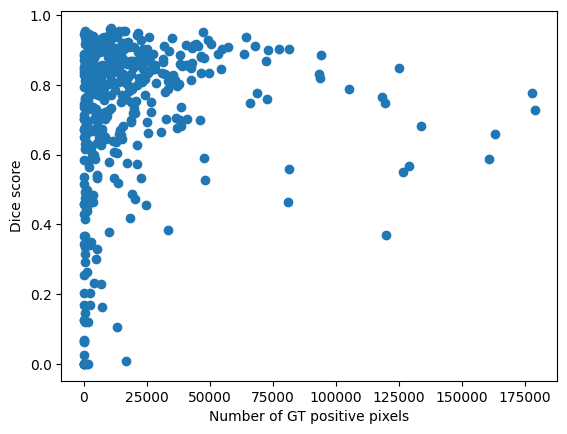

In [42]:
df = a_metrics_df
pos_imgs = df[df['n_ref']!=0]
plt.scatter(pos_imgs['n_ref'],pos_imgs['DICE'])
plt.xlabel('Number of GT positive pixels')
plt.ylabel('Dice score')


Text(0, 0.5, 'Dice score')

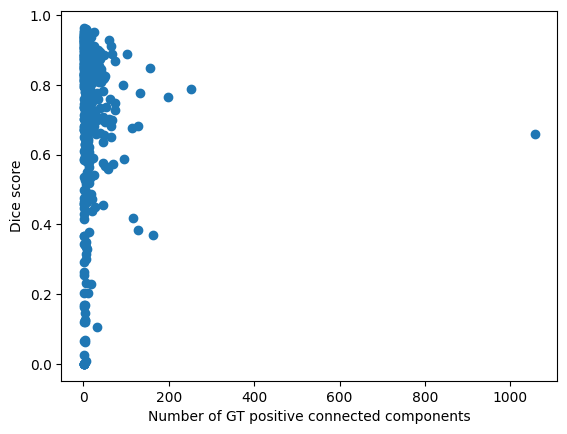

In [84]:
df = a_metrics_df
pos_imgs = df[df['n_ref']!=0]
plt.scatter(pos_imgs['num_gt_conn_comps'],pos_imgs['DICE'])
plt.xlabel('Number of GT positive connected components')
plt.ylabel('Dice score')

-96.0


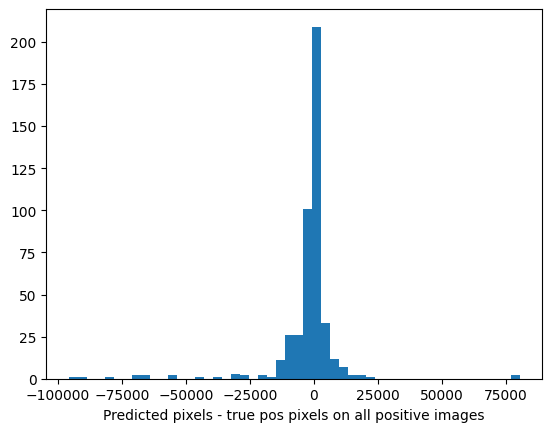

In [50]:
df = default_metrics_df
pos_imgs = df[df['n_ref']!=0]
plt.hist(pos_imgs['n_pred']-pos_imgs['n_ref'],bins=50)
plt.xlabel('Predicted pixels - true pos pixels on all positive images')
print((pos_imgs['n_pred']-pos_imgs['n_ref']).median())

## Apply post processing

In [6]:
def process_array(arr,min_size):
    min_size = int(min_size)
    
    unique_elements, counts = np.unique(arr, return_counts=True)

    # Create a mapping to change values less than 125 to 0
    change_to_zero = unique_elements[counts < min_size]

    # Create a new array with the same values as the input array
    processed_arr = arr.copy()

    # Change values less than 125 to 0
    for val in change_to_zero:
        processed_arr[processed_arr == val] = 0
        
    processed_arr[processed_arr != 0] = 1

    return processed_arr

def post_process_nifti(nifti_pred_path,output_path,min_size):
    # get numpy array
    pred_array, voxel_vol = nii2numpy(nifti_pred_path)
    pred_conn_comp = con_comp(pred_array)
    
    # returns numpy array with removal of small connected components
    processed_arr = process_array(pred_conn_comp,min_size)
    
    # return and save nifti image
    nifti_img = nib.Nifti1Image(processed_arr, affine=np.eye(4)) 
    nib.save(nifti_img, output_path)

In [11]:
CV_images_folder = 'nnUNet_results/Dataset219_PETCT/nnUNetTrainer_1500epochs_1e2lr__nnUNetPlans__3d_fullres_maxnum_512_patch_192/crossval_results_folds_0_1_2_3_4'
CV_images = [x for x in os.listdir(CV_images_folder) if '.nii.gz' in x]
processed_inference_folder='nnUNet_results/Dataset219_PETCT/nnUNetTrainer_1500epochs_1e2lr__nnUNetPlans__3d_fullres_maxnum_512_patch_192/processedCV'
#os.mkdir(processed_inference_folder)

for image in CV_images:
    post_process_nifti(os.path.join(CV_images_folder,image),os.path.join(processed_inference_folder,image),10)

### Calculate metrics after post-processing


In [14]:
V_images_folder = 'nnUNet_results/Dataset219_PETCT/nnUNetTrainer_1500epochs_1e2lr__nnUNetPlans__3d_fullres_maxnum_512_patch_192/crossval_results_folds_0_1_2_3_4'
CV_images = [x for x in os.listdir(CV_images_folder) if '.nii.gz' in x]
processed_inference_folder='nnUNet_results/Dataset219_PETCT/nnUNetTrainer_1500epochs_1e2lr__nnUNetPlans__3d_fullres_maxnum_512_patch_192/processedCV'

GT_labels_folder = 'nnUnet_raw/Dataset219_PETCT/labelsTr'

path_names = []
dice = []
fp= []
fn = []
for i in range(len(CV_images)):
    print(i)
    nii_gt_path, nii_pred_path = os.path.join(GT_labels_folder,CV_images[i]),os.path.join(processed_inference_folder,CV_images[i])
    nii_gt_path = plb.Path(nii_gt_path)
    nii_pred_path = plb.Path(nii_pred_path)
    dice_sc, false_pos_vol, false_neg_vol = compute_metrics(nii_gt_path, nii_pred_path)

    csv_header = ['gt_name', 'dice_sc', 'false_pos_vol', 'false_neg_vol']
    path_names.append(nii_gt_path.name)
    dice.append(dice_sc)
    fp.append(false_pos_vol)
    fn.append(false_neg_vol)

c_pp_metrics_df = pd.DataFrame()
c_pp_metrics_df['image'],c_pp_metrics_df['DICE'],c_pp_metrics_df['challenge_FP'],c_pp_metrics_df['challenge_FN'] = path_names,dice,fp,fn

c_pp_metrics_df.to_csv('c-219-pp-CV-results.csv')

0
1
2


/tmp/slurm-24629573/ipykernel_146157/368949640.py:55: RuntimeWarning: invalid value encountered in scalar divide
  dice_score = 2*overlap/sum


3
4
5


KeyboardInterrupt: 

In [27]:
c_pp_metrics_df = pd.read_csv('c-219-pp-CV-results.csv')
c_pp_metrics_df

,Unnamed: 0,image,DICE,challenge_FP,challenge_FN
0,0,PETCT_92c5c944a5_07152002.nii.gz,0.706859,0.000,1.483
1,1,PETCT_9ffd8409b3_07152005.nii.gz,0.827998,0.000,0.155
2,2,PETCT_f8de0cde56_12052005.nii.gz,NaN,0.000,0.000
3,3,PETCT_f60ea3abc5_05032003.nii.gz,0.874398,0.000,0.131
4,4,PETCT_b7c1533a39_02122005.nii.gz,0.886500,0.967,0.161
...,...,...,...,...,...
914,914,PETCT_3481507253_06172007.nii.gz,NaN,0.000,0.000
915,915,PETCT_93bea242d1_07252002.nii.gz,0.770750,0.000,0.000
916,916,PETCT_a4a66c4fa7_07072006.nii.gz,NaN,0.000,0.000
917,917,PETCT_790246c76c_02072004.nii.gz,0.710195,0.209,0.000


In [29]:
c_metrics_df['filename'] = c_metrics_df['prediction_file'].apply(lambda x: x.split("/")[-1])

# Merge the DataFrames based on the condition
merged_df = c_pp_metrics_df.merge(c_metrics_df[['filename', 'n_ref']], 
                                  left_on='image', 
                                  right_on='filename', 
                                  how='left')

# Fill NaN values in 'n_ref' column with 0 if needed
#merged_df['n_ref'] = merged_df['n_ref'].fillna(0)

# Assign the values back to the original DataFrame
c_pp_metrics_df['n_ref'] = merged_df['n_ref']

In [35]:
c_pp_metrics_df

,Unnamed: 0,image,DICE,challenge_FP,challenge_FN,n_ref
0,0,PETCT_92c5c944a5_07152002.nii.gz,0.706859,0.000,1.483,177997
1,1,PETCT_9ffd8409b3_07152005.nii.gz,0.827998,0.000,0.155,1369
2,2,PETCT_f8de0cde56_12052005.nii.gz,NaN,0.000,0.000,0
3,3,PETCT_f60ea3abc5_05032003.nii.gz,0.874398,0.000,0.131,46492
4,4,PETCT_b7c1533a39_02122005.nii.gz,0.886500,0.967,0.161,20359
...,...,...,...,...,...,...
914,914,PETCT_3481507253_06172007.nii.gz,NaN,0.000,0.000,0
915,915,PETCT_93bea242d1_07252002.nii.gz,0.770750,0.000,0.000,2109
916,916,PETCT_a4a66c4fa7_07072006.nii.gz,NaN,0.000,0.000,0
917,917,PETCT_790246c76c_02072004.nii.gz,0.710195,0.209,0.000,5493


In [38]:
df = c_pp_metrics_df
print('DICE')
print(df[df['n_ref']!=0]['DICE'].mean())
print('FN')
print(df[df['n_ref']!=0]['challenge_FN'].mean())
print('FP')
print(df['challenge_FP'].mean())


DICE
0.7410400435450663
FN
1.2246563192904656
FP
0.5402829162132753


## Download 10 training images

In [41]:
# set up new folders

example_images_folder = 'Example-preds-nnUNetTrainer__nnUNetPlans__3d_fullres-CV'
cv_preds_folder = 'Example-preds-nnUNetTrainer__nnUNetPlans__3d_fullres-CV/CV-preds'
imagesTr_folder = 'Example-preds-nnUNetTrainer__nnUNetPlans__3d_fullres-CV/imagesTr'
labelsTr_folder = 'Example-preds-nnUNetTrainer__nnUNetPlans__3d_fullres-CV/labelsTr'


if not os.path.exists(example_images_folder):
    os.mkdir(os.path.join(example_images_folder))

if not os.path.exists(cv_preds_folder):
    os.mkdir(os.path.join(cv_preds_folder))

if not os.path.exists(imagesTr_folder):
    os.mkdir(os.path.join(imagesTr_folder))

if not os.path.exists(labelsTr_folder):
    os.mkdir(os.path.join(labelsTr_folder))


In [39]:
CV_folder_path = 'nnUNet_results/Dataset219_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/crossval_results_folds_0_1_2_3_4'
example_preds = os.listdir(CV_folder_path)[0:10]
data_ids = [x[:-7] for x in example_preds]


['PETCT_92c5c944a5_07152002.nii.gz',
 'PETCT_9ffd8409b3_07152005.nii.gz',
 'PETCT_f8de0cde56_12052005.nii.gz',
 'PETCT_f60ea3abc5_05032003.nii.gz',
 'PETCT_b7c1533a39_02122005.nii.gz',
 'PETCT_82137245b0_01262002.nii.gz',
 'PETCT_ccd8f5ff71_10292006.nii.gz',
 'PETCT_9860ffe82d_11192004.nii.gz',
 'PETCT_cb240e6f0f_04192007.nii.gz',
 'PETCT_d3208ff062_03142003.nii.gz']

In [ ]:
# copy the 10 example predictions
import shutil

for image in example_preds:
    shutil.copy(os.path.join(CV_folder_path,image),cv_preds_folder)

In [49]:
# copy the 10 corresponding PET and 10 corresponding CT images
images_tr_folder = 'nnUnet_raw/Dataset219_PETCT/imagesTr'
for image in os.listdir(images_tr_folder):
    for example_id in data_ids:
        if example_id in image:
            shutil.copy(os.path.join(images_tr_folder,image),imagesTr_folder)


In [51]:
# copy 10 corresponding labels
old_labels_tr_folder = 'nnUnet_raw/Dataset219_PETCT/labelsTr'
for image in os.listdir(old_labels_tr_folder):
    for example_id in data_ids:
        if example_id in image:
            shutil.copy(os.path.join(old_labels_tr_folder,image),labelsTr_folder)

## Look at other prediciton files eg .npz and .pkl

In [130]:
os.listdir('nnUNet_results/Dataset218_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation/')

['PETCT_9ffd8409b3_07152005.nii.gz',
 'PETCT_75046e0c12_10292004.pkl',
 'PETCT_be3e55a32f_04052001.npz',
 'PETCT_82137245b0_01262002.nii.gz',
 'PETCT_5d994c3f44_03052006.npz',
 'PETCT_8bebb676bf_12202002.pkl',
 'PETCT_b2f82ed4b9_04172003.pkl',
 'PETCT_fe705ea1cc_12292002.pkl',
 'PETCT_e61c9da258_12132002.npz',
 'PETCT_e61c9da258_12132002.pkl',
 'PETCT_a2676f03c0_05092003.nii.gz',
 'PETCT_2946d59a94_11062006.pkl',
 'PETCT_21e4ffcb52_05062002.npz',
 'PETCT_d8a92bafe3_03182007.npz',
 'PETCT_0011f3deaf_03232003.pkl',
 'PETCT_b327726c24_08272000.nii.gz',
 'PETCT_12025abab5_11012004.nii.gz',
 'PETCT_c4a686881e_04231999.npz',
 'PETCT_802f19931c_06302002.npz',
 'PETCT_7ef5343426_05122005.pkl',
 'PETCT_6aea5c3a03_12272001.nii.gz',
 'PETCT_0011f3deaf_03232003.npz',
 'PETCT_db3daf78d2_10302000.nii.gz',
 'PETCT_b41bc7c1e5_11052006.pkl',
 'PETCT_274688d0a8_03242007.pkl',
 'PETCT_2946d59a94_11062006.npz',
 'PETCT_380f71df1e_08192001.nii.gz',
 'PETCT_ae96f738c0_09112003.pkl',
 'PETCT_69c90b6820_11212

In [131]:
fold0_path = 'nnUNet_results/Dataset218_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation/'
ex_npz = 'PETCT_be3e55a32f_04052001.npz'
ex_pkl = 'PETCT_75046e0c12_10292004.pkl'

In [132]:
npz= np.load(os.path.join(fold0_path,ex_npz))

In [134]:
npz

NpzFile 'nnUNet_results/Dataset218_PETCT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation/PETCT_be3e55a32f_04052001.npz' with keys: probabilities

In [133]:
print(npz['probabilities'].shape)
print((npz['probabilities'][0]+npz['probabilities'][1]).flatten().mean())
print(npz['probabilities'][1].flatten().mean())
print(npz['probabilities'][0].flatten().mean())

(2, 284, 400, 400)
1.0
0.000114219954
0.9998859


In [15]:
npz['probabilities']

array([[[[9.9999988e-01, 9.9999988e-01, 9.9999988e-01, ...,
          9.9999988e-01, 9.9999988e-01, 9.9999988e-01],
         [9.9999976e-01, 9.9999988e-01, 1.0000000e+00, ...,
          1.0000000e+00, 9.9999988e-01, 9.9999976e-01],
         [9.9999976e-01, 9.9999988e-01, 9.9999988e-01, ...,
          9.9999988e-01, 9.9999988e-01, 9.9999976e-01],
         ...,
         [9.9999988e-01, 1.0000000e+00, 1.0000000e+00, ...,
          1.0000000e+00, 1.0000000e+00, 9.9999988e-01],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ...,
          1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [9.9999988e-01, 1.0000000e+00, 1.0000000e+00, ...,
          1.0000000e+00, 1.0000000e+00, 9.9999988e-01]],

        [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ...,
          1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ...,
          1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, .

In [16]:
import pickle


with open(os.path.join(fold0_path,ex_pkl), 'rb') as f:
    data = pickle.load(f)

In [17]:
data

{'sitk_stuff': {'spacing': (2.0364201068878174, 2.0364201068878174, 3.0),
  'origin': (-406.6929931640625, 201.12158203125, -1261.0),
  'direction': (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)},
 'spacing': [3.0, 2.0364201068878174, 2.0364201068878174],
 'shape_before_cropping': (326, 400, 400),
 'bbox_used_for_cropping': [[0, 326], [0, 400], [0, 400]],
 'shape_after_cropping_and_before_resampling': (326, 400, 400),
 'class_locations': {1: []}}